In [38]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [12]:
# cargar datos
(X_train, y_train), (X_test, y_test) = load_data()

# procesamiento de datos
X_train = X_train.reshape((-1, 28, 28, 1))
X_train = X_train/255
X_test = X_test.reshape((-1, 28, 28, 1))
X_test = X_test/255

# parámetros de capacitación
batch_size = 8
n_epochs  = 20
learn_rate = 0.0001

# modelo
model = tf.keras.Sequential()
model.add(tf.keras.Input(shape=(28, 28, 1)))

# por favor, complete el modelo basado en cnn y la capacitación

In [13]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [14]:
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(filters=64, kernel_size=(5,5), padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(units=1024, activation='relu'))

model.add(layers.Dropout(rate=0.5))

model.add(layers.Dense(units=10, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=learn_rate), loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
with tf.device('/GPU:0'):
    modelo = model.fit(X_train, y_train, epochs=n_epochs, batch_size=batch_size, validation_data=(X_test, y_test))

Epoch 1/20
7500/7500 [==============================] - 28s 3ms/step - loss: 0.4887 - accuracy: 0.8245 - val_loss: 0.3930 - val_accuracy: 0.8574
Epoch 2/20
7500/7500 [==============================] - 25s 3ms/step - loss: 0.3239 - accuracy: 0.8826 - val_loss: 0.3099 - val_accuracy: 0.8865
Epoch 3/20
7500/7500 [==============================] - 25s 3ms/step - loss: 0.2728 - accuracy: 0.9018 - val_loss: 0.2772 - val_accuracy: 0.8989
Epoch 4/20
7500/7500 [==============================] - 25s 3ms/step - loss: 0.2417 - accuracy: 0.9112 - val_loss: 0.2570 - val_accuracy: 0.9070
Epoch 5/20
7500/7500 [==============================] - 26s 3ms/step - loss: 0.2163 - accuracy: 0.9202 - val_loss: 0.2385 - val_accuracy: 0.9123
Epoch 6/20
7500/7500 [==============================] - 25s 3ms/step - loss: 0.1955 - accuracy: 0.9280 - val_loss: 0.2418 - val_accuracy: 0.9108
Epoch 7/20
7500/7500 [==============================] - 26s 3ms/step - loss: 0.1793 - accuracy: 0.9347 - val_loss: 0.2321 - val_ac

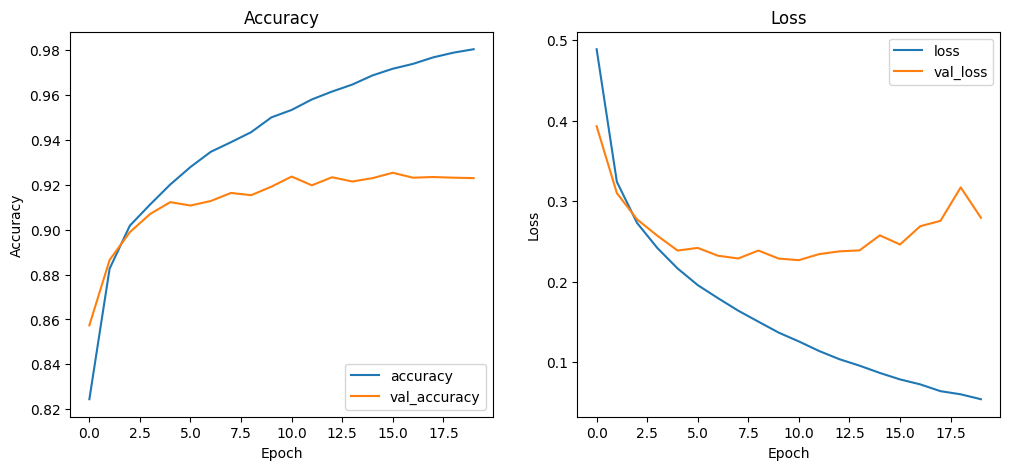

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(modelo.history['accuracy'], label='accuracy')
plt.plot(modelo.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(modelo.history['loss'], label='loss')
plt.plot(modelo.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

313/313 [==============================] - 1s 2ms/step


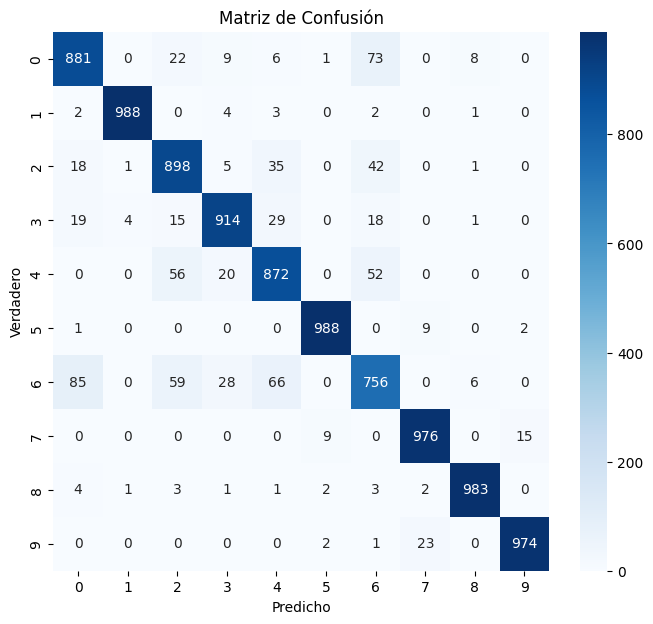

In [36]:
plt.figure(figsize=(8, 7))

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

y_test_clases = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_test_clases, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicho")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

In [40]:
print(classification_report(y_test_clases, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1000
           1       0.99      0.99      0.99      1000
           2       0.85      0.90      0.87      1000
           3       0.93      0.91      0.92      1000
           4       0.86      0.87      0.87      1000
           5       0.99      0.99      0.99      1000
           6       0.80      0.76      0.78      1000
           7       0.97      0.98      0.97      1000
           8       0.98      0.98      0.98      1000
           9       0.98      0.97      0.98      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

